# Cognitive Systems Methods
    Assignment 4: Linear Regression
    Thi Le Thanh - 1504521
    Metropolia UAS
        

# 

In [174]:
# Require libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [175]:
column_names = ["fixed acidity","volatile acidity","citric acid",
                "residual sugar", "chlorides", "free sulfur dioxide",
                "total sulfur dioxide", "density", "pH", "sulphates",
                "alcohol", "quality"]

df = pd.read_csv("winequality-red.csv", sep =";")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [176]:
# Split the dataset into explanatory and response variables.
df_x = df.iloc[:,:11] 
df_y = df.iloc[:,11]

In [177]:
# build and fit model
reg = linear_model.LinearRegression()
reg.fit(df_x,df_y)

# output model
print("Coefficients:" ,reg.coef_)
print('\n')
print("Intercept:", reg.intercept_)
print('\n')

# compute predicted values
Y_pred = reg.predict(df_x)
# compute error statistics
mse = mean_squared_error(df_y, Y_pred)
r2s = r2_score(df_y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

Coefficients: [  2.49905527e-02  -1.08359026e+00  -1.82563948e-01   1.63312698e-02
  -1.87422516e+00   4.36133331e-03  -3.26457970e-03  -1.78811638e+01
  -4.13653144e-01   9.16334413e-01   2.76197699e-01]


Intercept: 21.9652084495


MSE =  0.416767167221
R2s =  0.360551703039


In [178]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([df_y, pd.Series(Y_pred), pd.Series(df_y-Y_pred)], axis=1)
df2.columns=['Observed','Predicted','Residual']
df2.head(10)

,Observed,Predicted,Residual
0,5,5.032850,-0.032850
1,5,5.137880,-0.137880
2,5,5.209895,-0.209895
3,6,5.693858,0.306142
4,5,5.032850,-0.032850
5,5,5.065570,-0.065570
6,5,5.107069,-0.107069
7,7,5.343707,1.656293
8,7,5.336705,1.663295
9,5,5.658406,-0.658406


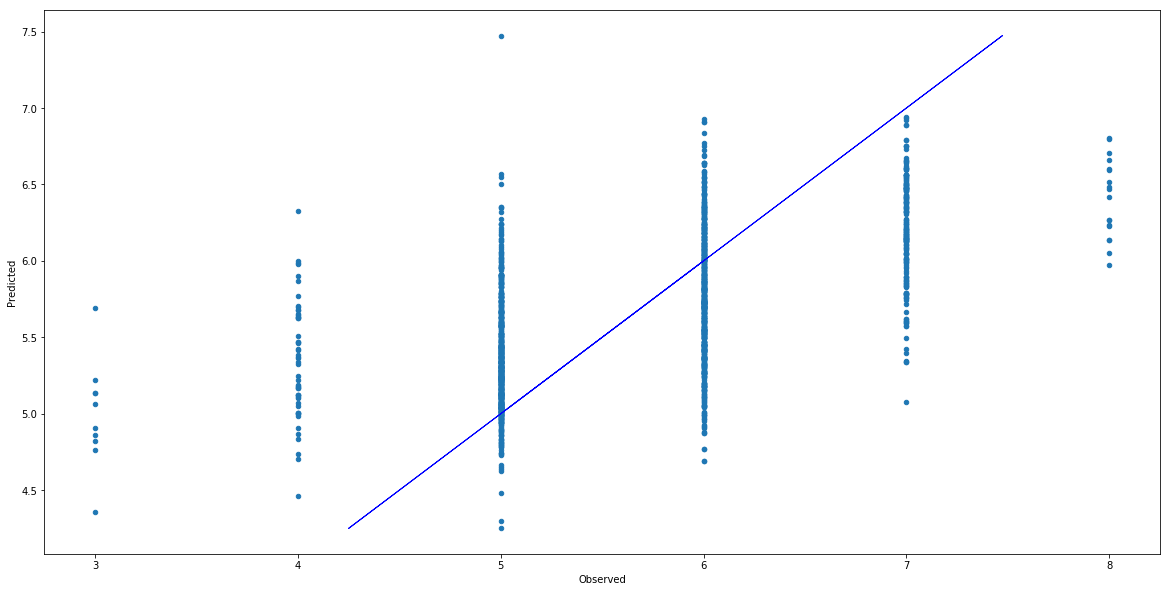

In [179]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='Observed', y='Predicted', figsize = (20,10))
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

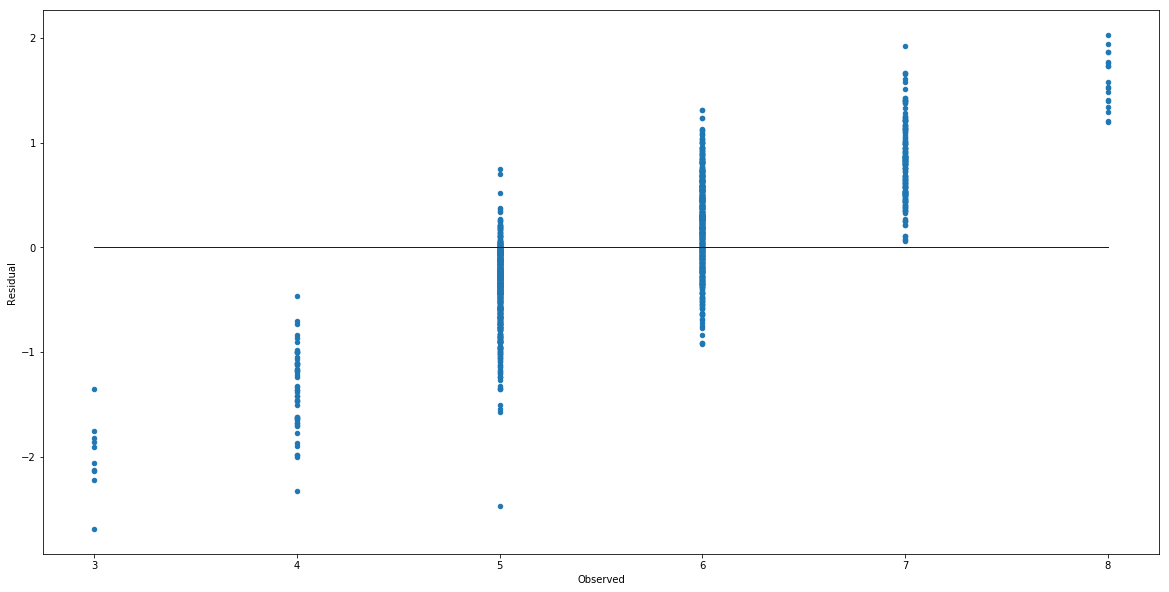

In [180]:
# plot residuals
plt.figure()
df2.plot.scatter(x='Observed', y='Residual', figsize = (20,10))
plt.plot([3,8], [0,0], color='blue', linewidth=1)
plt.show()

In [181]:
input_variable_names = ["fixed acidity","volatile acidity","citric acid",
                "residual sugar", "chlorides", "free sulfur dioxide",
                "total sulfur dioxide", "density", "pH", "sulfates",
                "alcohol"]
coefficient = {"Coefficient" : reg.coef_.tolist(), "Input Variables": input_variable_names}
pd.DataFrame(coefficient, columns =["Input Variables","Coefficient"])

,Input Variables,Coefficient
0,fixed acidity,0.024991
1,volatile acidity,-1.083590
2,citric acid,-0.182564
3,residual sugar,0.016331
4,chlorides,-1.874225
5,free sulfur dioxide,0.004361
6,total sulfur dioxide,-0.003265
7,density,-17.881164
8,pH,-0.413653
9,sulfates,0.916334


In [182]:
# From the Coefficient above, we can select 5 most useful variables 
df1_x = df.loc[:,["volatile acidity","chlorides",
                       "density", "pH", "sulphates"]]
df1_y = df.iloc[:,11]


In [183]:
# normalize variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
Xn = dfn.iloc[:,:11]
Yn = dfn.iloc[:,11]
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print('\n')
print("Standardized variables:")
print("Coefficients:" ,reg2.coef_)
print('\n')
print("Intercept:", reg2.intercept_)
print('\n')

Y_pred2 = reg2.predict(Xn)
# compute error statistics
mse_2 = mean_squared_error(Yn, Y_pred2)
r2s_2 = r2_score(Yn, Y_pred2) 
print("MSE = ", mse_2)
print("R2s = ", r2s_2)



Standardized variables:
Coefficients: [ 0.05387891 -0.24026089 -0.0440379   0.02851261 -0.1092302   0.05649078
 -0.13297854 -0.04178926 -0.07907982  0.1923365   0.36447012]


Intercept: 1.20856341673e-15


MSE =  0.639448296961
R2s =  0.360551703039


In [184]:
coefficient2 = {"Coefficient" : reg2.coef_.tolist(), "Input Variables": input_variable_names}
pd.DataFrame(coefficient2, columns =["Input Variables","Coefficient"])

,Input Variables,Coefficient
0,fixed acidity,0.053879
1,volatile acidity,-0.240261
2,citric acid,-0.044038
3,residual sugar,0.028513
4,chlorides,-0.109230
5,free sulfur dioxide,0.056491
6,total sulfur dioxide,-0.132979
7,density,-0.041789
8,pH,-0.079080
9,sulfates,0.192336


In [185]:
# From the Coefficient above, we can select 5 most useful variables 
df2_x = df.loc[:,["volatile acidity","chlorides",
                       "density","sulphates",'alcohol']]
df2_y = df.iloc[:,11]


In [ ]:
# Split the dataset into training and testing sets.
train_x, test_x, train_y, test_y = train_test_split(df_x, 
                                             df_y, 
                                             test_size = 0.3,shuffle = False )

In [186]:
# build and fit model
reg3 = linear_model.LinearRegression()
reg3.fit(train_x,train_y)

# output model
print("Coefficients 3:" ,reg3.coef_)
print('\n')
print("Intercept 3:", reg3.intercept_)
print('\n')

# compute predicted values
Y_pred3 = reg3.predict(test_x)
# compute error statistics
mse_3 = mean_squared_error(test_y, Y_pred3)
r2s_3 = r2_score(test_y, Y_pred3) 
print("MSE 3 = ", mse_3)
print("R2s 3= ", r2s_3)

Coefficients 3: [  5.85436316e-02  -1.03131028e+00  -3.06558081e-01   4.07705009e-02
  -1.41013541e+00   2.68896163e-03  -3.70070080e-03  -4.80512958e+01
  -1.74545285e-01   7.49874821e-01   2.71133637e-01]


Intercept 3: 51.1158607715


MSE 3 =  0.446961150373
R2s 3=  0.301163491568


In [189]:
coefficient3 = {"Coefficient 3" : reg3.coef_.tolist(), "Input Variables": input_variable_names}
pd.DataFrame(coefficient3, columns =["Input Variables","Coefficient"])


,Input Variables,Coefficient
0,fixed acidity,NaN
1,volatile acidity,NaN
2,citric acid,NaN
3,residual sugar,NaN
4,chlorides,NaN
5,free sulfur dioxide,NaN
6,total sulfur dioxide,NaN
7,density,NaN
8,pH,NaN
9,sulfates,NaN


In [161]:
k_partition = 10
validation_samples_number = len(train_x) // k_partition 

for i in range(k_partition):
    print("Processing fold #", i)
    validation_data = train_x[i * validation_samples_number: (i+1) * validation_samples_number]
    validation_output = train_y[i * validation_samples_number: (i+1) * validation_samples_number]
    partial_train_data = np.concatenate( [train_x[:i * validation_samples_number], train_x[(i+1) * validation_samples_number:]], axis = 0)
    partial_train_output = np.concatenate( [train_y[:i * validation_samples_number], train_y[(i+1) * validation_samples_number:]], axis =0)
    

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
Processing fold # 4
Processing fold # 5
Processing fold # 6
Processing fold # 7
Processing fold # 8
Processing fold # 9
